<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management,<br/> Analysis and Security</h1>

<h1 align='center'> Assignment - 2</h1>

-----
<br/>

## Grading

|**Maximum Marks**         |  **100**
|--------------------------|--------
|  **Weight**              |  **20% of the Total Course Grade**
|  **Submission deadline** |  **7:00PM, Friday, May 24**
|  **Submission mode**     |  **Electronic, Using GitLab <br/> One submission per group**
|  **Estimated time**      |  **20 hours**
|  **Penalty**             |  **100% after the deadline**
  


## Submission

You need to submit the notebook `Assignment-2.ipynb` and any other additional files that you may have created / hyperlinked in this notebook, as part of your submission by pushing it to your forked GitLab repository. You need to add your group details below. Make sure your group works on and submits only have one fork of the assignment repository. 


### Note:

* It is strongly advised to read the whole assignment before attempting it and have at least a cursory glance at the dataset in order to gauge the requirements and understand what you need to do as a bigger picture.

* For answers requiring free form written text, use the designated cells denoted by `YOUR ANSWER HERE` -- double click on the cell to write inside them.

* For all coding questions please write your code after the comment `YOUR CODE HERE`.

* In the process of testing your code, you can insert more cells or use print statements for debugging, but when submitting your file remember to remove these cells and calls respectively.

* You will be marked on **correctness** and **readability** of your code, if your marker can't understand your code your marks may be deducted.

<span style="color:blue">
    
### Group Number :  123

### Student IDs: u6492211, u6399075, u6560914

</span>

## Introduction



In [1]:
# IMPORTING FREQUENTLY USED PYTHON MODULES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2
import os
plt.style.use('seaborn-notebook')
%matplotlib inline

# JUST TO MAKE SURE SOME WARNINGS ARE IGNORED 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# IMPORT ANY OTHER REQUIRED MODULES IN THIS CELL
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from scipy import stats

***

## Section A - Database Management (15 Marks)

You have been given the following database containing 15 tables relating to **DVD Movie Rentals**. The data contained in these tables is as follows -

|  **Table**               |  **Data Description**      |
|--------------------------|----------------------------|
|  actor                   |  actors data including first name and last name     |
|  film                    |  films data such as title, release year, length, rating, etc      |
|  film_actor              |  stores the relationships between films and actors |
|  category                |  stores film’s categories data |
|  film_category           |  stores the relationships between films and categories | 
|  store                   |  store data including manager staff and address |
|  inventory               |  stores inventory data |
|  rental                  |  stores rental data |
|  payment                 |  stores customer's payments |
|  staff                   |  stores staff data |
|  customer                |  stores customer data |
|  address                 |  address data for staff and customers |
|  city                    |  stores city data |
|  country                 |  stores country data |

Visualizing the relations between these tables can be aided by looking at the below **E-R Diagram**.

<img src='./dvd_rental_er.png'>

Based on your understanding of the relationships between these tables, answer the following questions by writing SQL queries to get the required data rows from the database and display them as a **Pandas dataframe**. 


#### **NOTE**:
For the following questions, in the CSIT labs you will be able to connect directly to the database using the below code within the notebook. From outside of the CSIT labs, you will need to perform SQL queries in your terminal by using [partch](https://cs.anu.edu.au/docs/student-computing-environment/linuxlabs/remoteaccess/#connectingtopartch3). Once you have the correct query, you may just fill in the boxes below.

**Partch Instructions**
1. Connect to partch as per the above hyperlink
2. In your terminal, enter `psql` to access the sql database
3. Enter `\c dvdrental` to ensure you are accessing the assignment database (or simply specify dvdrental when connecting to the database server -- `psql dvdrental`).
4. (Sanity Check) Enter `SELECT * FROM actor;` . If you receive the first row to be "Penelope Guiness", you should be good to go !
***

In [3]:
# Connect using psycopg2
conn = psycopg2.connect(host="/var/run/postgresql", database="dvdrental")

# Activate connection cursor
curr = conn.cursor()

In [4]:
def execute_sql(query):
    # Select table and display
    curr.execute(query)

    # Fetches all the rows from the result of the query
    rows = curr.fetchall()
    
    # Gets the column names for the table
    colnames = [desc[0] for desc in curr.description]

    # Converts into readable pandas dataframe
    df_result = pd.DataFrame(rows, columns=colnames)
    return df_result

### 1. Write an SQL query to determine the total sales from the rentals of the film 'Affair Prejudice' from the rental store with `store_id = 2`. Your query should result in a single column called `Total Rental Cost` with the value of the total cost of all these rentals.
<span style= 'float: right;'><b>[3 marks]</b></span>

In [5]:
# YOUR QUERY HERE

query = """
        SELECT SUM(amount) as "Total Rental Cost"
        FROM payment 
        WHERE rental_id IN
            (
            SELECT rental_id 
            FROM rental 
            WHERE inventory_id IN
                (
                SELECT inventory_id 
                FROM inventory
                WHERE store_id = 2 AND film_id IN
                    (
                    SELECT film_id 
                    FROM film 
                    WHERE title = 'Affair Prejudice'
                    ) 
                )
            )
        """

execute_sql(query)

,Total Rental Cost
0,33.91


### 2. Write an SQL query to retrieve the names of all customers who rented the film ‘Affair Prejudice’ from the store with `store_id = 1`. The result of your query should display each customer's first name and last name. 
<span style= 'float: right;'><b>[3 marks]</b></span>

In [6]:
# YOUR QUERY HERE

query = """
        SELECT first_name, last_name
        FROM customer 
        WHERE customer_id IN
            (
            SELECT customer_id 
            FROM rental 
            WHERE inventory_id IN
                (
                SELECT inventory_id 
                FROM inventory 
                WHERE store_id = 1 AND film_id IN
                    (
                    SELECT film_id 
                    FROM film 
                    WHERE title = 'Affair Prejudice'
                    ) 
                )
            )
        """

execute_sql(query)

,first_name,last_name
0,Carmen,Owens
1,Nina,Soto
2,Danielle,Daniels
3,Tommy,Collazo
4,Vivian,Ruiz
5,Jeff,East
6,Megan,Palmer
7,Minnie,Romero
8,Natalie,Meyer
9,Michael,Silverman


### 3. Write an SQL query to retrieve the names of all those customers who have a total of more than 100 dollars in recorded payments. Your query's result should include each customer's first name, last name and customer ID. 
<span style= 'float: right;'><b>[4 marks]</b></span>

In [7]:
# YOUR QUERY HERE

query = '''
SELECT first_name, last_name, temp.customer_id
FROM customer JOIN (SELECT SUM(amount) AS total_payment, customer_id
FROM payment GROUP BY customer_id
HAVING SUM(amount) > 100)
AS temp ON customer.customer_id = temp.customer_id
'''

execute_sql(query)

,first_name,last_name,customer_id
0,Vickie,Brewer,251
1,Sylvia,Ortiz,120
2,Miriam,Mckinney,285
3,Gilbert,Sledge,497
4,Tonya,Chapman,209
5,Clifton,Malcolm,577
6,Guy,Brownlee,550
7,Terry,Carlson,253
8,Sherry,Marshall,119
9,Gabriel,Harder,518


### 4. Write an SQL query to retrieve the names of all customers who have rented the movie ‘Angels Life’ from *both* stores with `store_id = 1` and `store_id = 2`. Your query's result should include each customer's first name, last name and customer ID.
<span style= 'float: right;'><b>[5 marks]</b></span>

In [8]:
# YOUR QUERY HERE

query = "SELECT first_name, last_name, customer_id FROM customer WHERE customer_id IN(SELECT customer_id FROM rental WHERE inventory_id IN (SELECT inventory_id FROM inventory WHERE film_id IN (SELECT film_id FROM film WHERE title = 'Angels Life'))) AND (store_id = 1 OR store_id =2);"


execute_sql(query)

,first_name,last_name,customer_id
0,Jimmie,Eggleston,558
1,Philip,Causey,393
2,Arlene,Harvey,225
3,Gene,Sanborn,498
4,Priscilla,Lowe,273
5,Gilbert,Sledge,497
6,Joanne,Robertson,147
7,Cathy,Spencer,163
8,Jennie,Terry,265
9,Heather,Morris,53


***

## Section B - Data Acquisition (20 Marks)

In this section, you need to read and import the data from the database into Python and make it ready to be used by your machine learning algorithms in the next section. **Your task here is to load the required columns from the various appropriate tables in the database to fuel the data required to train your machine learning models in the next section.** You can load the required data into one or more Pandas dataframes, to suit the the needs of different Machine Learning models in Section C. 

If you fail to do so, or an error in the previous section is preventing you from doing so, we can provide you with a **CSV of the required data**. If you choose to use this CSV, you will not receive any marks for this section, but you'll be able to do the following section without having to spend time on this section.  

<span style='color:red;'><b>Note:</b> While you are provided the .csv files to use for development of the later questions at home, you must submit a copy of the code that can read the database to receive marks for this section.</span>
<span style= 'float: right;'><b>[20 marks]</b></span>

In [9]:
# YOUR CODE HERE

# Common data 

# Section C part 1.2 K-means cluster data
# 1. total number of movies the customer rented
kmquery1 = '''
SELECT COUNT(rental_id), customer_id
FROM rental
GROUP BY customer_id
'''
df_km1 = execute_sql(kmquery1)
df_km1.head()

,count,customer_id
0,31,251
1,23,106
2,32,120
3,26,285
4,25,264


In [110]:
# 2. favorite rating of the movie they rented
# 3. average length of the movies they rented 
# 5.category loyalty the movies they rented 
# four of these can put into one query
kmquery2 = '''
SELECT temp2.rating, temp2.length ,temp2.customer_id, film_category.category_id
FROM
(SELECT temp.film_id, film.rating, film.length, film.rental_rate, film.rental_duration, film.special_features ,temp.customer_id
FROM
(SELECT inventory.film_id, rental.customer_id 
FROM inventory JOIN rental ON rental.inventory_id = inventory.inventory_id)
AS temp JOIN film on film.film_id = temp.film_id)
AS temp2 JOIN film_category 
ON temp2.film_id = film_category.film_id
'''
df_km2 = execute_sql(kmquery2)
le = LabelEncoder()
le.fit(['G','PG','PG-13', 'R', 'NC-17'])

df_km2['rating'] = le.transform(df_km2['rating'])

df_km2.head()

,rating,length,customer_id,category_id
0,4,126,459,12
1,0,156,408,3
2,4,181,333,11
3,1,84,222,3
4,1,92,549,5


In [150]:
from collections import Counter
# join df_km1 and df_km2 and also group cutomer_id to get average
def find_mode(arr):
    temp = []
    for x in arr:
        temp.extend(x)
    return Counter(temp).most_common()
    #return stats.mode(temp)[0][0]
def find_mode_int(arr):
    temp = [] 
    for x in arr:
        temp.append(x)
    return Counter(temp).most_common()
df_km2_update = df_km2[['customer_id', 'rating', 'length', 'category_id']].groupby('customer_id').aggregate({'rating': find_mode_int, 'length': np.mean , 'category_id': find_mode_int})
df_km3 = df_km2_update.merge(df_km1, how='inner', left_on = 'customer_id', right_on = 'customer_id')
# category / based on consumer loyalty 
df_km3['category_id'] = list(map(lambda x: x[0][1] - x[-1][1], df_km3['category_id']))
df_km3['category_id'] = df_km3['category_id']/df_km3['count']

# rating average 
def calculate_rating_avg(arr):
    max_c = arr[0][1]
    index = 0 
    count = 0
    value = 0
    for v,n in arr:
        if n != max_c:
            break
        count += 1
        value += v
        
    return value/count
df_km3['rating'] = list(map(calculate_rating_avg, df_km3['rating']))
df_km3.describe()

,customer_id,rating,length,category_id,count
count,599.000000,599.000000,599.000000,599.000000,599.000000
mean,300.000000,2.196299,115.038963,0.124513,26.784641
std,173.060683,1.205446,7.786703,0.034308,5.110357
min,1.000000,0.000000,90.687500,0.035714,12.000000
25%,150.500000,1.000000,109.750000,0.100000,23.000000
50%,300.000000,2.000000,115.148148,0.120000,26.000000
75%,449.500000,3.000000,119.900657,0.142857,30.000000
max,599.000000,4.000000,139.952381,0.291667,46.000000


In [ ]:


# Section C part 2 Classification data
query2 = '''SELECT film.film_id,rating, category_id, rental_duration,title,rental_rate FROM film, film_category WHERE film.film_id = film_category.film_id '''
query1 = '''SELECT actor_id,film_id FROM film_actor'''
df_sectionC1 = execute_sql(query1)
df_sectionC2 = execute_sql(query2)

df_sectionC1['actor_count'] = df_sectionC1.groupby('film_id')['film_id'].transform('count')
df_sectionC1.sort_values("film_id", inplace=True) 
df_sectionC1 = df_sectionC1[['film_id','actor_count']]
df_sectionC1 = df_sectionC1.drop_duplicates()

df_sectionC2[['rating']]= df_sectionC2[['rating']].apply(LabelEncoder().fit_transform)
df_sectionC2[['title']]= df_sectionC2[['title']].apply(LabelEncoder().fit_transform)
df_sectionC = pd.merge(df_sectionC1, df_sectionC2, on='film_id', how='inner')
# Section D descision tree data



***

## Section C - Machine Learning (55 Marks)
<span style='color:purple;'><b>Note:</b> We have provided the .csv outputs for the files to use in these questions if you are working on the assignment at home. Please note if any of these questions refer to those csvs and not the data from Section B in your submitted assignment, you will receive no marks for Section B.</span>

In [ ]:
## Import csv files for home development here as necessary. 
homework_actor = pd.read_csv("data/dvd_rental/actor.csv")
# read in other csvs as necessary.

### Part 1 - Clustering (25 Marks)

### Part 1.1 - Clustering Short Answers (8 Marks)

#### 1. Can a Decision Tree be used to perform clustering? If so, explain how. If not, provide a counterexample showing how it is not suitable for the function.
<span style= 'float: right;'><b>[4 marks]</b></span>

#### <span style="color:blue"> Your answer here: </span>

In this question, we specify the Decision Tree algorithm as the one we have in the Scikit-Learn’s package. Then, in this case we could say that "Decision Tree" cannot be used to perform clustering. It is because clustering analysis is an unsupervised problem and hence it uses unsupervised machine learning algorithm. On the other hand, 'Decision Tree' is a supervised machine-learning algorithm that does not fit to unsupervised problems. 

To explain the difference between supervised learning and unsupervised learning, the unsupervised learning model attempts to find the patterns directly from the given data while supervised learning model reads the input and then matches the result with the labels that are already provided by the dataset.

For counterexample, practically, if one uses 'Decision Tree' algorithm in the clustering problem, he cannot find 'labels' in the dataset to fit into the 'y' parameter in the 'Decision Tree' model. 

However, I may agree that there are some clustering algorithm is implemented via a decision-tree-like process. Nevertheless, in this question we assume that "Decision Tree" only refers to the supervised algoirithm in the Scikit-Learn’s package. 

#### 2. Will a K-means Clustering Algorithm generate the same results each time? Provide examples on how this may or may not be the case.
<span style= 'float: right;'><b>[4 marks]</b></span>

#### <span style="color:blue"> Your answer here: </span>

No, a K-means Clustering Algorithm may not generate the same results each time. It is because usually the locations of the initial centroids are selected randomly. Since the locations of the initial centroids will impact on the result, the K-Mean Algirithm may not generate the same results each time. 

For example, let us see the graph below 
<img src='./kmeaneg1.png' height="400" width="400">
this is the example dataset we are using. Now, first of all, let us initialise the centroids when K = 2
<img src='./kmeaneg2.png' height="400" width="400">
Then, the final result will look similar like the graph below.
<img src='./kmeaneg3.png' height="400" width="400">
However, if we initialise the centroid shown in the graph below
<img src='./kmeaneg4.png' height="400" width="400">
Then we probably get this final clustering result.
<img src='./kmeaneg5.png' height="400" width="400">
As we can see from the example, the model does not converge to same points with different initialization.


### Part 1.2 - K-Means Clustering Implementation (17 Marks)

Clustering helps visualise a dataset based on attributes considered important to the data scientist and/or reader.  From the dataset acquired after completing **Section - B**, implement a `K-Means clustering algorithm` to help you cluster the dataset of customers on the basis of the movies they have rented from the DVD rental stores. Various attributes related to the movies such `rating`, `year`, `rental_rate` and `year` may be useful for this exercise. Another interesting attribute that you can look at is the `fulltext` of the movie. In terms of the customer details, you can look at which movies a customer has rented, and the total number of movies rented by a customer. After you've prepared your learning model, plot a **visualization** showing the different clusters. If you have used more than 2 features for your clustering, you are still expected to provide a visualization by reducing the dimensions into a 2D graph.

It's upto you to decide how many clusters you would like to incorporate in your model. You are expected to justify all aspects of your implementation including the reasoning behind the choice of **the number of clusters** and **number of iterations** in your model. 

<span style='color:red;'><b>Note:</b> You are only allowed to use packages that are within the Anaconda distribution.</span>
<span style= 'float: right;'><b>[15 marks total: 10 marks model, 5 marks justification & commentary]</b></span>

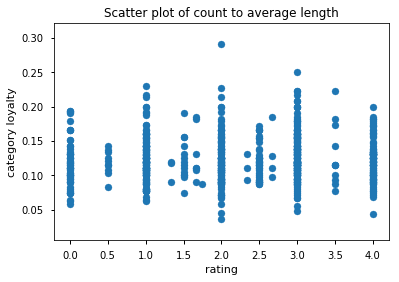

In [155]:
# YOUR CODE HERE
# cluster the dataset of customers 
# on the basis of the movie they rented 
# movie -- rating, length, rental_rate, rental_duration 

# customer side
# which movies a customers has rented 
# and the total number of movies rented by them

# In this case, we decide that the features we are going to consider in order to cluster the customers are 
# 1. total number of movies the customer rented
# 2. favorite rating of the movie they rented
# 3. mode special_features of the movies they rented 
# 4. category loyalty the movies they rented 

# So we are going to obtain these data in Section B 
train_x = df_km3.drop(columns=['customer_id', 'length', 'count'])


# randomly select two features to show the scatter 
# to see if i can get some human heuristic about the size of cluster K 
plt.scatter( train_x['rating'], train_x['category_id'])
plt.xlabel('rating')
plt.ylabel('category loyalty')
plt.title('Scatter plot of count to average length')
plt.show()



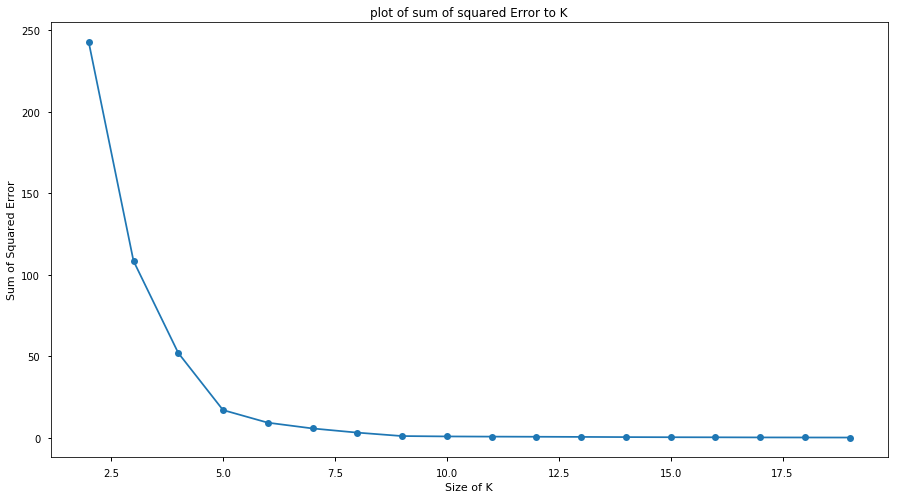

In [156]:
# it seems that we could not find any clue about the size of cluster K in the graph above 
# After search the web page https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#elbow-method
# it suggests to use elbow method 
# thus let us form the graph to see the graph of changes of sum of squared distances as the k changes 
# attribute inertia_ : float
# |      Sum of squared distances of samples to their closest cluster center.
inertia_list = []
index = []
for x in range(2, 20):
    model = KMeans(x, max_iter= 300)
    model.fit(train_x)
    index.append(x)
    inertia_list.append(model.inertia_)

plt.figure(figsize=(15,8))
plt.plot(index, inertia_list, 'o-')
plt.title('plot of sum of squared Error to K')
plt.xlabel('Size of K')
plt.ylabel('Sum of Squared Error')
plt.show()

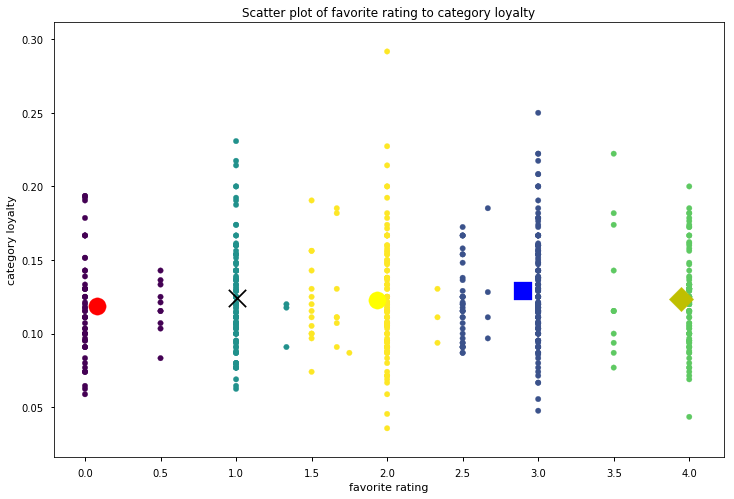

In [167]:
# As the graph shows, 5 is the elbow point, thus choosing 5 be the value of K  

final_km_model = KMeans(5,max_iter= 100)
final_km_model.fit(train_x)

labels = final_km_model.labels_
centroid = final_km_model.cluster_centers_

markers = ['o', 's', 'x' ,'D', 'o' ]
markers_colour = ['r', 'b', 'k', 'y','yellow']
plt.figure(figsize=(12,8))
plt.scatter(train_x['rating'], train_x['category_id'], c=labels, s=30, cmap='viridis')

# plot the centroids 
for x in range(len(markers)):
    # rating is at 2nd dimension and count is at 5th dimension 
    plt.scatter(centroid[x, 0], centroid[x, 1], c=markers_colour[x], s=300, marker=markers[x])
plt.xlabel('favorite rating')
plt.ylabel('category loyalty')
plt.title('Scatter plot of favorite rating to category loyalty')
plt.show()


#### <span style="color:blue"> Your justifications & commentary here: </span>

##### The choice of the features 
Encode labels with value between 0 and n_classes-1.

##### 2D Scatter plot for multidimensional data

##### The choice of the number of clusters K  
During the lecture the lecturer suggests that we can 

##### The choice of the number of max iteration 


#### What do your resulting clusters represent?  Explain the distinguishing characteristics of each cluster. 
<span style= 'float: right;'><b>[2 marks]</b></span>

In [ ]:
train_x['cluster'] = labels
pt = train_x.pivot_table(index='cluster', values=['length', 'rating', 'count'], aggfunc=np.mean)
pt

#### <span style="color:blue"> Your answer here: </span>

First of all, we could not directly determine the number of cluster through the 2D graph directly. And as a result, we obtain the number of clusters using 'Elbow Method'. However, the graph we obtained from the 'Elbow Method' using Sum of Squared Error is not good too (i.e. we cannot see an obvious elbow in the graph). As such, we cannot really tell what our resulting clusters represents. 

Moreover, it is hard to distinguish characteristics of each clusters for a multidimensional day through 2D scatter graph. As shown in the graph above, the elements under the same cluster do not even gather together under the 2D scatter plot. 

***

### Part 2 - Classification (30 Marks)

The rental company has decided that they want to use simple machine learning to allocate price tags to their movies. The tags are as follows:


|  **Classification**      |  **Requirements**        |
|--------------------------|------------------------- |
|  Cheap                   |  Rental Rate is 0.99   |
|  Moderate                |  Rental Rate is 2.99   |
|  Expensive               |  Rental Rate is 4.99  |


**Your task is to implement a `Classification Algorithm` (such as K-Nearest Neighbours) that can predict the `Price Label` of a movie**. You are required to perform the following tasks:

1. Create useable dataset/s by manually determining the 'truth values' for existing data (where the rating is within the classification system defined above)
2. Implement an algorithm that can predict the classification as per the above classifications.
3. Perform independent testing of the model and provide statistical metrics outlining the performance of your model. Splitting the dataset into testing and training subsets will assist with this.

You are welcome to use any features within the dataset, except the `Rental Rate` of the film. Various attributes relating to a movie in the tables `rating`, `movie`, `film_actor`, `actor` and `film_category` can be helpful while making the algorithm. If required, you can also look to make new **compound attributes** that may be helpful in increasing the accuracy of your model.
You are expected to justify all aspects of your answer including the features used, the metrics provided and validation system employed. Provide commentary on the strengths and potential pitfalls of the model.

<span style='color:red;'><b>Note:</b> You are only allowed to use packages that are within the Anaconda distribution. This means packages such as Keras, Tensorflow etc are not available for use.</span> 
<span style= 'float: right;'><b>[25 marks total: 18 marks model, 7 marks justification & commentary]</b></span>

In [ ]:
# YOUR CODE HERE
# Part1: Determine truth values
def rental_label(row):
    if float(row['rental_rate']) == 0.99:
        return 'Cheap'
    elif float(row['rental_rate']) == 2.99:
        return 'Moderate'
    else:
        return 'Expensive'

df_classification = df_sectionC
df_classification['rental_label'] = df_classification.apply (lambda row: rental_label(row), axis=1)
df_classification = df_classification.drop(columns = 'rental_rate')

#Part2: Implementation 
classifier = KNeighborsClassifier(n_neighbors=5)

#Part3 : Testing and Statistical metrics
#X = df_classification[['film_id','actor_count','rating','category_id','rental_duration','title']]
X = df_classification.drop(columns = 'rental_label')
Y = df_classification['rental_label']
x_train, x_test, y_train, y_test = train_test_split(X,Y, random_state=2)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy_score(y_test,y_pred)
#df_classification

#### <span style="color:blue"> Your justifications & commentary here: </span>

**

#### Would you be able to get a better result, if you had used Clustering as a pre-processing step before Classfication? Justify your answer. 
<span style= 'float: right;'><b>[5 marks]</b></span>

#### <span style="color:blue"> Your answer here: </span>

**

***

## Section D - Decision Trees (10 Marks)

The following is a small synthetic data set about the weather conditions.  We are
going to try and use decision trees to predict whether it will rain or not on the given day.


|Temperature| Cloudy| UV Index| Humidity| Rain
|---:|--:|--:|--:|--:|
|25|No| Low| Low| No 
|29|No| Low| High| No
|26|No| Low| Medium| No
|26|No| Medium| Medium| No
|27|No| Medium| High| No
|28|No| High | High| No
|25|No| High |Low| No
|29|Yes| Low |Low| Yes
|28|No| Medium| High| Yes
|28|Yes| Medium| High| Yes
|26|No| Low |Low| Yes
|27|Yes| Low |High| Yes

**Note:**
* You can treat temperature as a continuous variable and split it on a range of values (to convert it to a categorical variable, for example).
* Attribute selection in the tree uses information gain.
* You can use LaTeX and/or markdown to format your equations.

#### 1. What is the initial entropy of Cloudy?

<span style= 'float: right;'><b>[3 marks]</b></span>

<span style="color:blue">
    
#### YOUR ANSWER HERE

</span>


<b>From the data set above, we find:</b>

<table>
    <tr>
        <td colspan = "2">Cloudy</td>
    </tr>
    <tr>
        <td>YES</td>
        <td>NO</td>
    </tr>
    <tr>
        <td>3</td>
        <td>9</td>
    </tr>
</table>

The probability of YES = $\tfrac {1}{4}$ 

The probability of NO = $\tfrac {3}{4}$

<b>According to the formula: </b>

Entropy H:

$$H(X) = -\sum_{x\in X} p(x){\log_2}p(x)$$


<b>We can find the initial entropy of Cloudy:</b>

$$Entropy(Cloudy) = -\tfrac {1}{4} {\log_2} \tfrac {1}{4} - \tfrac {3}{4} {\log_2} \tfrac {3}{4} \approx {0.81}$$



#### 2. Which attribute would the decision-tree building algorithm choose at the root of the tree?

<span style= 'float: right;'><b>[3 marks]</b></span>

<span style="color:blue">
    
#### YOUR ANSWER HERE

</span>

<b>Answer: Cloudy</b>

<b>Here We use Information Gain to choose the attribute at the root of the tree</b>

By using information gain as a criterion, we try to estimate the information contained by each attribute. Placeing the attribute on the tree according to their values. And an attribute with best value among attributes should be positioned as root. 

<b>We split variables into predictor and target:</b>

predictor: Temperature, Cloudy, UV Index, Humidity

target: Rain

<b>By calculate each entropy of target and information gain for each predictor, we have information gain for each predictor as following:</b>

IG for Temp $\approx {0.1025}$ , IG for Cloudy $\approx {0.41}$, IG for UV Index $\approx {0.15}$, and IG for Humidity $\approx {0.15}$

<b>Since Cloudy has the highest value for information gain, thus, it will be chosen as the root of the tree by decision tree build-in algorithm.</b>

#### 3. Calculate and specify the information gain of the attribute you chose to split on in the previous question

<span style= 'float: right;'><b>[4 marks]</b></span>

<span style="color:blue">
    
#### YOUR ANSWER HERE

</span>

<b>We use the following two steps for calculating information gain for Cloudy:</b>
1. Calculate entropy of target(Rain)
2. Calculate entropy for the chosen attribute(Cloudy). Using information gain formula, substracting this entropy from the entropy of target.

<b>From the given data set:</b>

<table>
    <tr>
        <td colspan = "2">Rain</td>
    </tr>
    <tr>
        <td>YES</td>
        <td>NO</td>
    </tr>
    <tr>
        <td>5</td>
        <td>7</td>
    </tr>
</table>

The probability of YES = $\tfrac {5}{12}$ 

The probability of NO = $\tfrac {7}{12}$

<b>According to the formula: </b>

Entropy H:

$$H(X) = -\sum_{x\in X} p(x){\log_2}p(x)$$


<b>We can find the entropy of Rain:</b>

$$Entropy(Rain) = -\tfrac {5}{12} {\log_2} \tfrac {5}{12} - \tfrac {7}{12} {\log_2} \tfrac {7}{12} \approx {0.98}$$

<b>By checking the data set: </b>

P(Is Cloudy) = $\tfrac {3}{12}$

P(Not Cloudy) = $\tfrac {9}{12}$

<table>
    <tr>
        <td></td>
        <td>Raining</td>
        <td>Not Raining</td>
    </tr>
    <tr>
        <td>Is Cludy</td>
        <td>3</td>
        <td>0</td>
    </tr>
    <tr>
        <td>Not Cloudy</td>
        <td>2</td>
        <td>7</td>
    </tr>
</table>

<ul>
   <li>P(Is Cloudy & Raining) = $\tfrac {3}{3}$</li>
   <li>P(Is Cloudy & Not Raining) = 0</li>
   <li>P(Not Cloudy & Raining) = $\tfrac {2}{9}$</li>
   <li>P(Not Cloudy & Not Raining) = $\tfrac {7}{9}$</li>
</ul>

 $$Entropy(3, 0) = -\tfrac {3}{3} {\log_2} \tfrac {3}{3} - {0} {\log_2} 0 = {0}$$
 
 $$Entropy(2, 7) = -\tfrac {2}{9} {\log_2} \tfrac {2}{9} - \tfrac {7}{9} {\log_2} \tfrac {7}{9} \approx {0.76}$$
 
<b>Calculate entropy for Cloudy:</b> 
 
 $$Entropy(Cloudy) = P(Is \; Cloudy) \times P(3, 0) + P(Not \; Cloudy) \times P(2, 7) = \tfrac {3}{12} \times 0 + \tfrac {9}{12} \times 0.76 = {0} + {0.57} = {0.57} $$
 
<b>Calculate information gain for Cloudy:</b>

 $$Information \; Gain = Entropy(Rain) - Entropy(Rain, Cloudy) = {0.98} - {0.57} = {0.41}$$ 